In [349]:
from utils.data_generated import *




In [350]:
#load panda dataframes for movies, poeple, and cluster
movies = load_movie_metadata()
people = load_people()
cluster = load_cluster_optics()
ethnicities = load_ethnicities()

In [351]:
movies.head(1)

,index,movie_id_wikipedia,movie_id_freebase,title_id_imdb,movie_name,release_date,box_office_revenue,runtime,languages,countries,is_adult,genres_cmu,genres_imdb
0,0,975900,/m/03vyhn,tt0228333,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],0,"[Thriller, Science Fiction, Horror, Adventure,...","[Action, Horror, Sci-Fi]"


In [352]:
people.head(1)

,index,person_name_id,person_name,birth_year,death_year,primary_profession,known_for_titles,gender,heigth,ethnicity
0,0,nm0000002,Lauren Bacall,1924,2014,"[actress, soundtrack]","[tt0038355, tt0037382, tt0117057, tt0071877]",F,1.727,/m/048z7l


In [353]:
#count number of NaN values in ethnicites
ethnicities

,freebase_id,ethnicity
0,/m/0x67,African Americans
1,/m/064b9n,Omaha people
2,/m/041rx,Jewish people
3,/m/033tf_,Irish Americans
4,/m/04gfy7,Indian Americans
...,...,...
474,/m/043_z22,NaN
475,/m/04jtjvt,NaN
476,/m/04kdwcx,NaN
477,/m/04_8lfc,NaN


In [354]:
#transfomr dict cluster into dataframe, index is the cluster key and the corresponding value is the cluster value, with columns names person_name_id and cluster_id
cluster_df = pd.DataFrame.from_dict(cluster, orient='index', columns=['cluster_id'])
#name the index column
cluster_df.index.name = 'person_name_id'

#print number of clusters
print("Number of clusters: ", len(cluster_df.cluster_id.unique()))

Number of clusters:  6


There are a total of 6 clusters, 1 is the clusters of the outliers (with value -1).

In [355]:
#create panda dataframe on all custer_id == i, take corresponding person from people matching on person_name_id 
cluster1 = cluster_df[cluster_df['cluster_id'] == 0].join(people.set_index('person_name_id'))
cluster2 = cluster_df[cluster_df['cluster_id'] == 1].join(people.set_index('person_name_id'))
cluster3 = cluster_df[cluster_df['cluster_id'] == 2].join(people.set_index('person_name_id'))
cluster4 = cluster_df[cluster_df['cluster_id'] == 3].join(people.set_index('person_name_id'))
cluster5 = cluster_df[cluster_df['cluster_id'] == 4].join(people.set_index('person_name_id'))
cluster_outlier = cluster_df[cluster_df['cluster_id'] == -1].join(people.set_index('person_name_id'))


In [356]:
#print the number of people in each cluster
print('number of people in cluster 1: ', len(cluster1))
print('number of people in cluster 2: ', len(cluster2))
print('number of people in cluster 3: ', len(cluster3))
print('number of people in cluster 4: ', len(cluster4))
print('number of people in cluster 5: ', len(cluster5))
print('number of people in cluster outlier: ', len(cluster_outlier))

number of people in cluster 1:  25417
number of people in cluster 2:  2324
number of people in cluster 3:  1219
number of people in cluster 4:  1140
number of people in cluster 5:  3341
number of people in cluster outlier:  38299


In [357]:
#get all titles of movies in cluster 1 from columns known_for_titles. each entry is a list of titles. save all titles in a list, removing duplicates
def get_titles(cluster):
    titles_cluster = set()
    for i in range(len(cluster)):
        if type(cluster.iloc[i].known_for_titles) == list:
            for title in cluster.iloc[i].known_for_titles:
                titles_cluster.add(title)

    #make it a dataframe
    return pd.DataFrame(list(titles_cluster), columns=['title'])


In [358]:
titles_cluster1 = get_titles(cluster1)
titles_cluster2 = get_titles(cluster2)
titles_cluster3 = get_titles(cluster3)
titles_cluster4 = get_titles(cluster4)
titles_cluster5 = get_titles(cluster5)

In [359]:
#keep only movies that are in the cluster 1
movies_cluster1 = movies[movies['title_id_imdb'].isin(titles_cluster1['title'])]
movies_cluster2 = movies[movies['title_id_imdb'].isin(titles_cluster2['title'])]
movies_cluster3 = movies[movies['title_id_imdb'].isin(titles_cluster3['title'])]
movies_cluster4 = movies[movies['title_id_imdb'].isin(titles_cluster4['title'])]
movies_cluster5 = movies[movies['title_id_imdb'].isin(titles_cluster5['title'])]


In [360]:
#add column to ethnicites with name occurences
def get_ethnicities(cluster):
	e = ethnicities.copy()
	e['occurences'] = 0
	for ethnicity in people['ethnicity'].unique():
		#count occurence of ethnicit in cluster1
		count = len(cluster[cluster['ethnicity'] == ethnicity])
		e.loc[e['freebase_id'] == ethnicity, 'occurences'] = count
	e.drop(['freebase_id'], axis=1, inplace=True)
	e.dropna(inplace=True)
	e.sort_values(by=['occurences'], ascending=False, inplace=True)
	return e


In [361]:
ethnicities1 = get_ethnicities(cluster1)
ethnicities2 = get_ethnicities(cluster2)
ethnicities3 = get_ethnicities(cluster3)
ethnicities4 = get_ethnicities(cluster4)
ethnicities5 = get_ethnicities(cluster5)	

In [362]:
#plot ethnicities 1 ditribution
def plot_eth(*args):
    for (eth, id) in args:
        #print(eth, id)
        eth = eth.copy()
        eth = eth[eth['occurences'] > 0]
        #keep only 10 most occuring, drop the rest
        num = eth.shape[0]
        if num > 20:
            num = 20
        eth = eth[:num]
        #get name of variable eth
        x = eth['ethnicity']
        y = eth['occurences']
        
        title = '{} most represneted ethnicities in cluster {}'.format(num, id)
        eth.plot.bar(x='ethnicity', y='occurences', rot=90, figsize=(20,10), title=title)



    
 

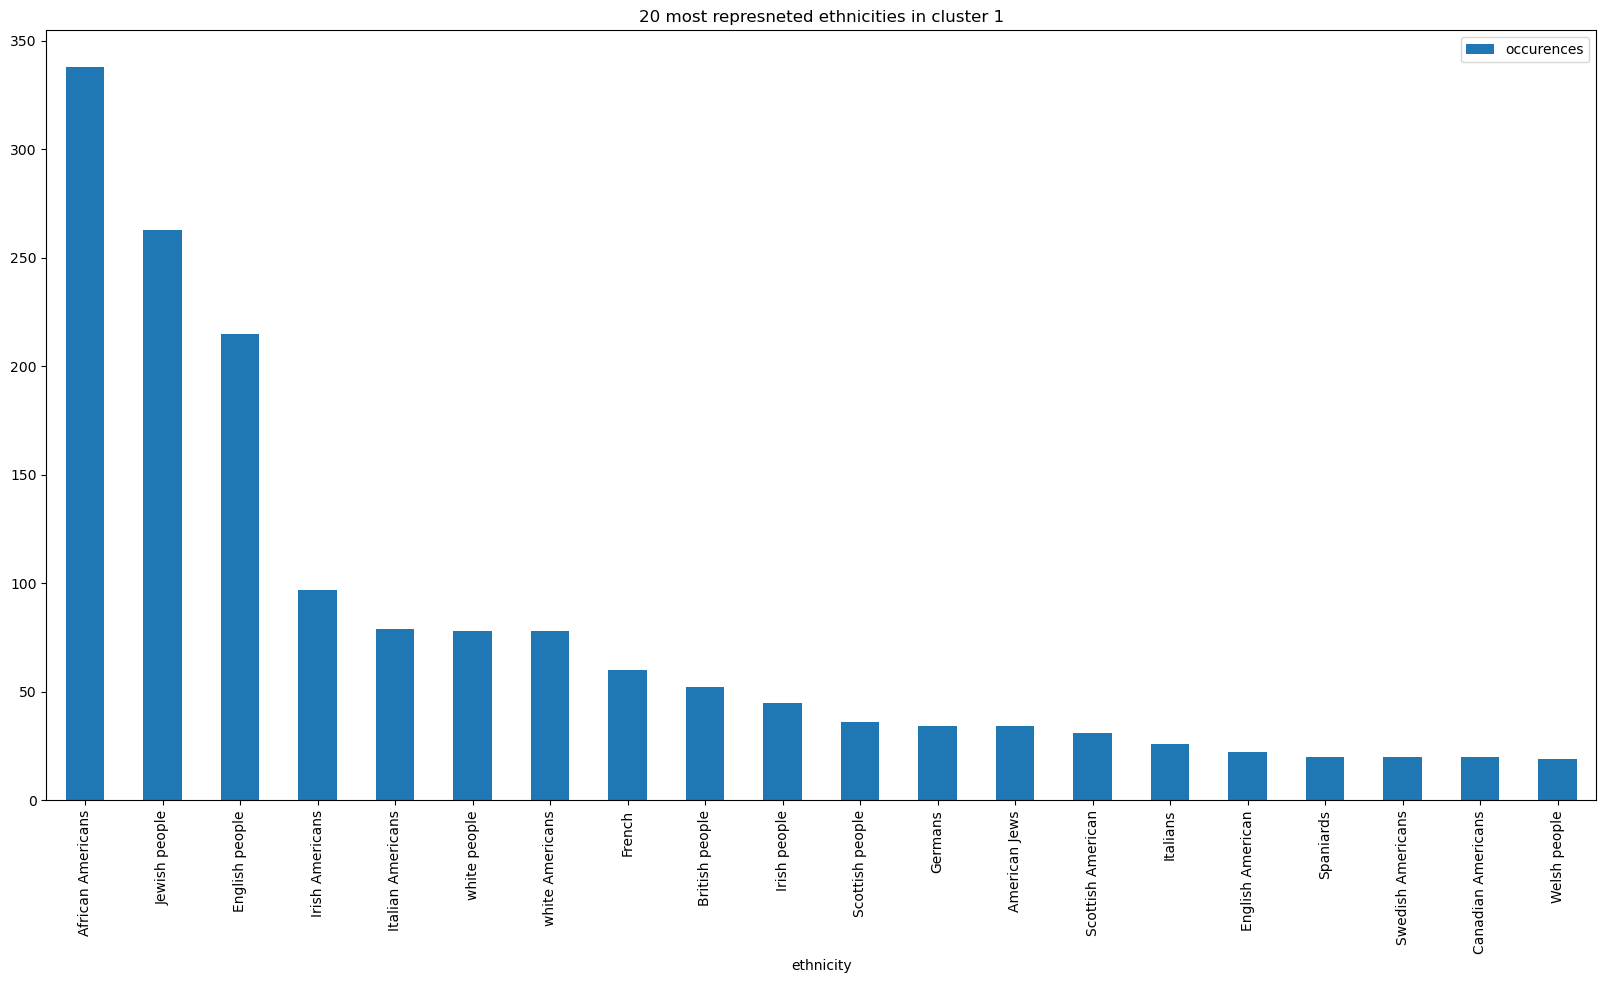

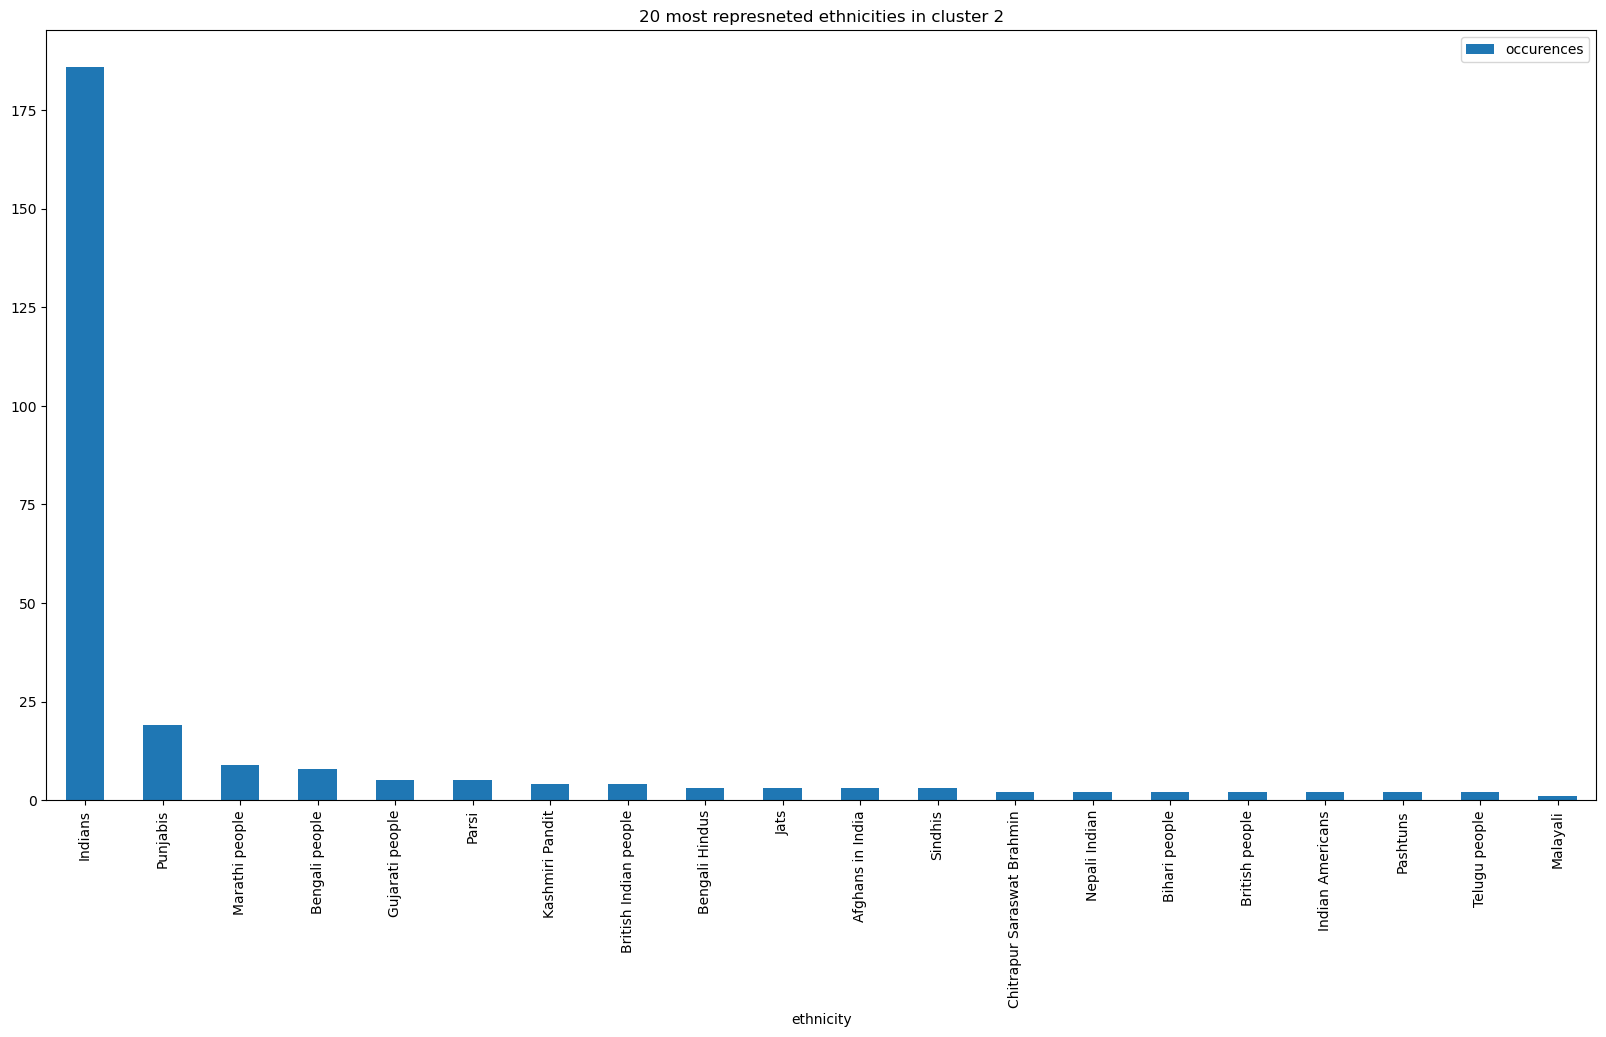

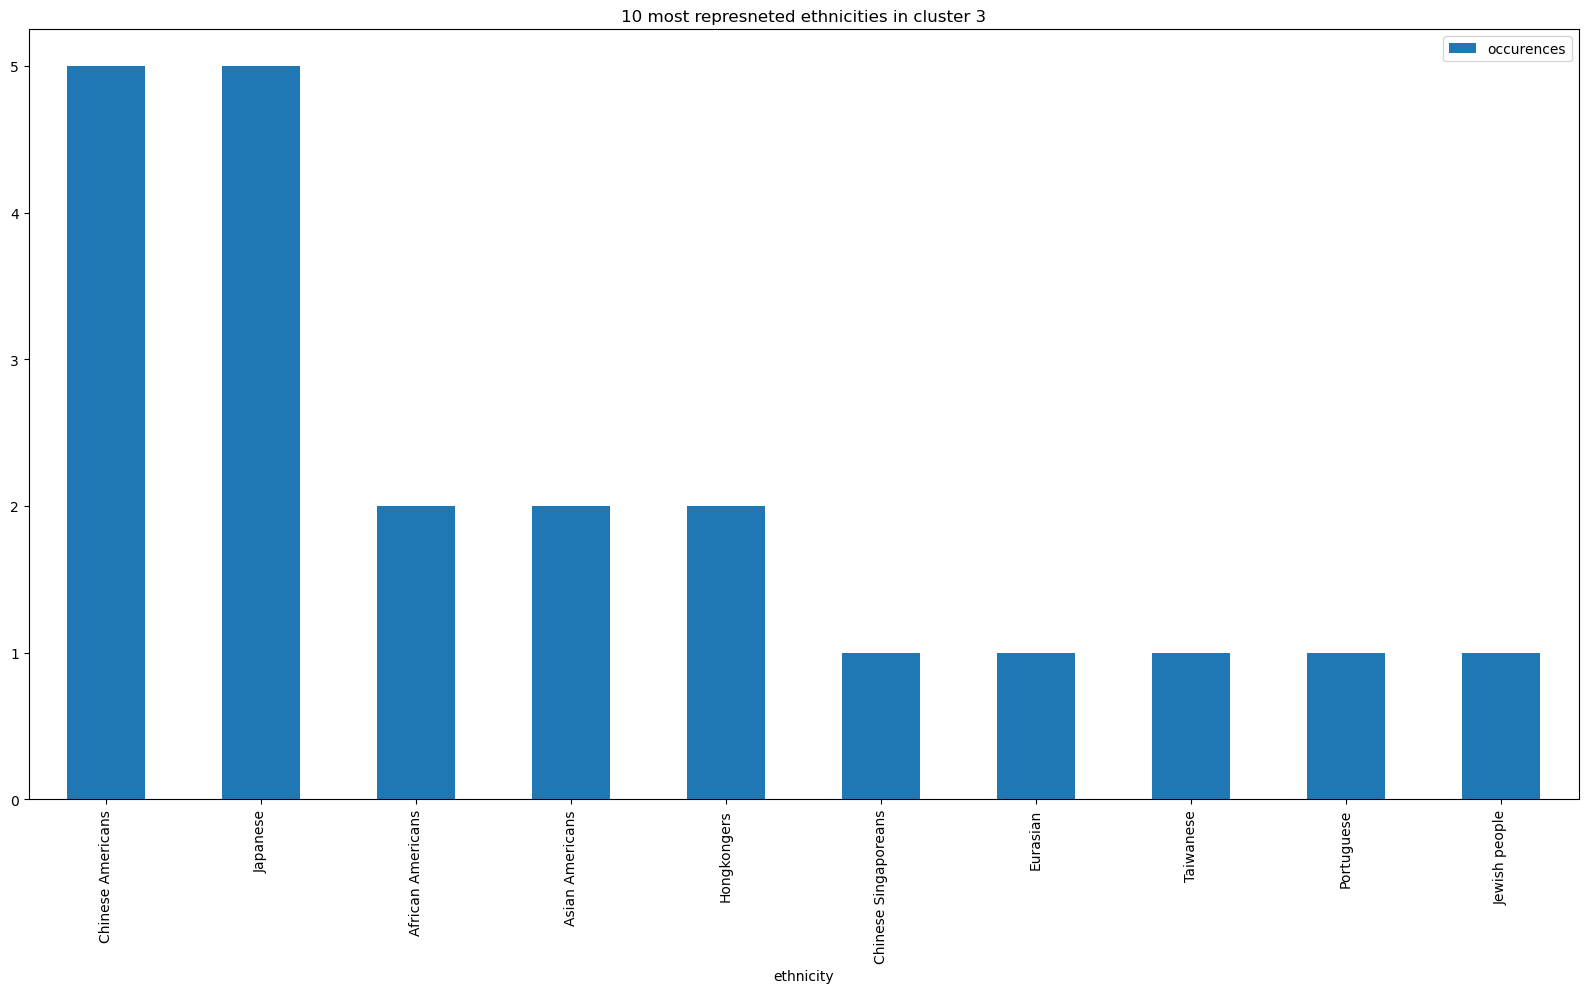

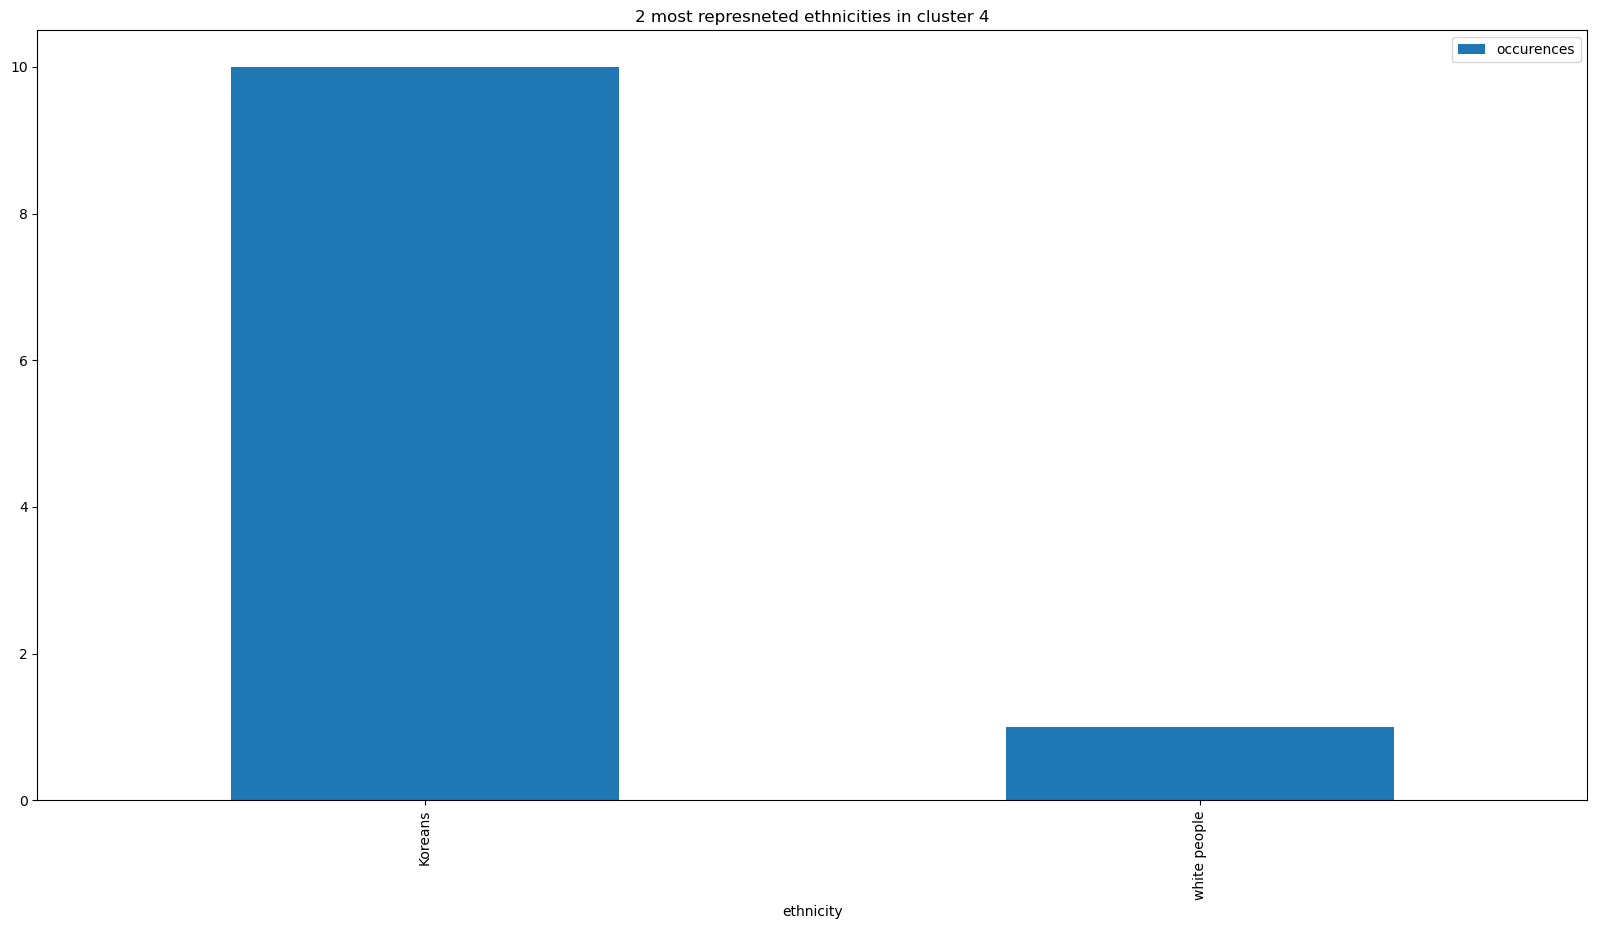

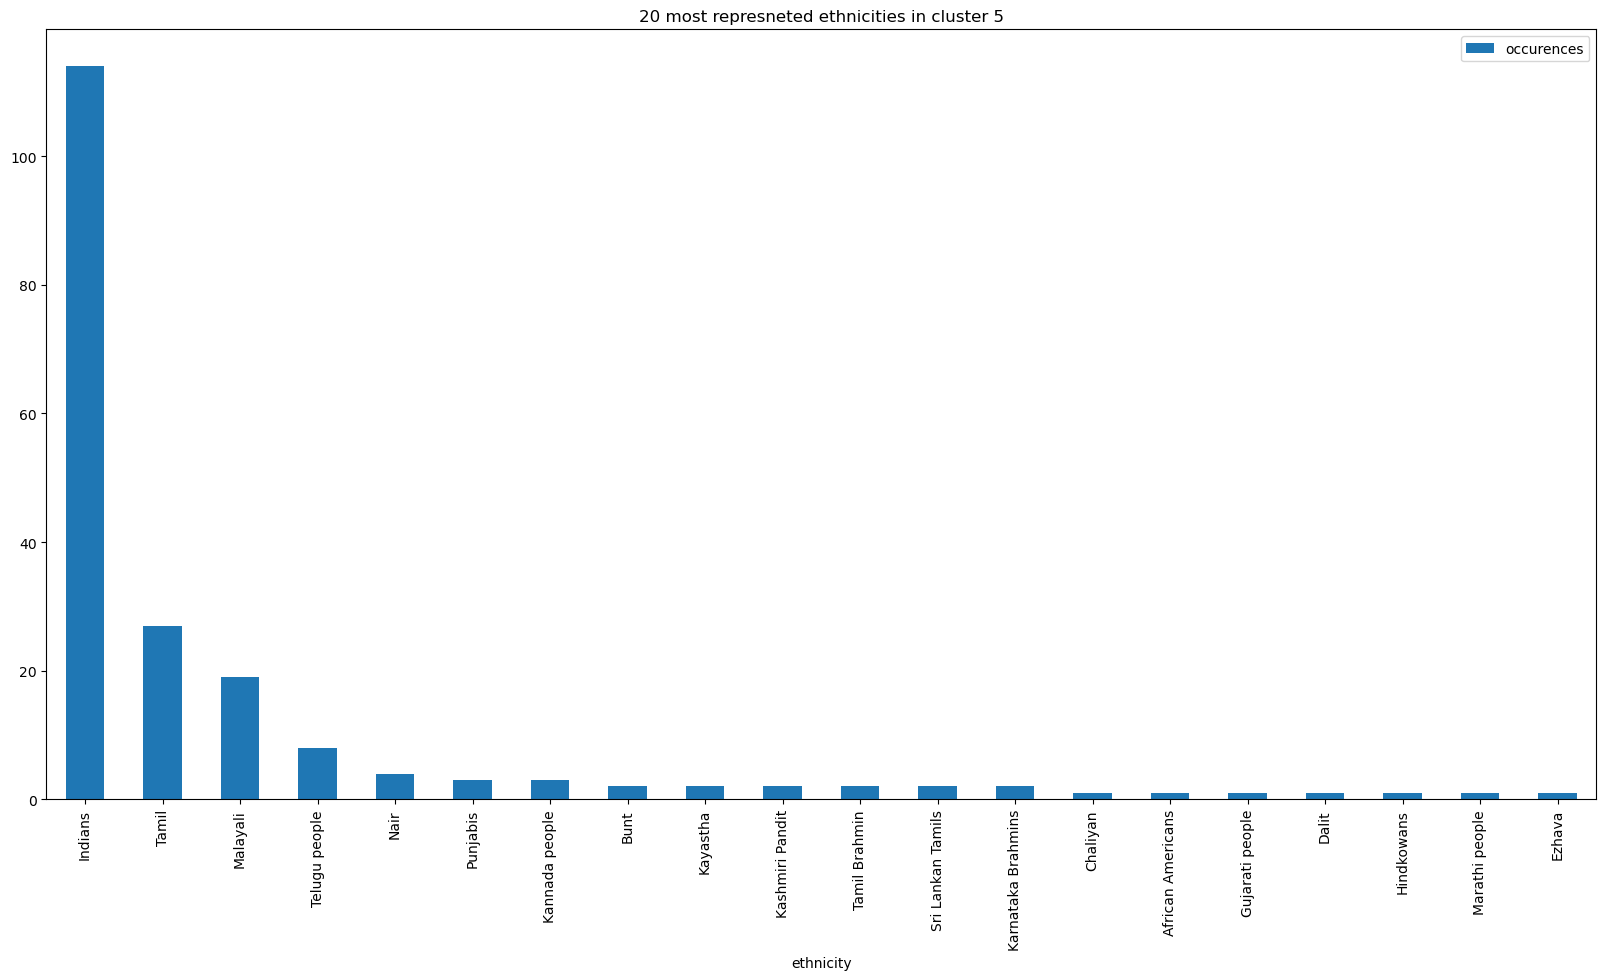

In [363]:

plot_eth((ethnicities1, 1), (ethnicities2, 2),
         (ethnicities3, 3), (ethnicities4, 4),(ethnicities5, 5) )
